<a href="https://colab.research.google.com/github/blueabstract/Image-Histogram-Equalization-Contrast-Enhancement/blob/main/Image_Histogram_Equalization_%26_Contrast_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

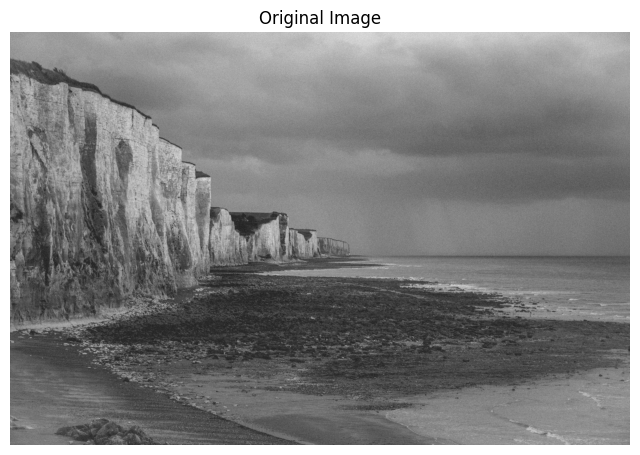

In [11]:
img = cv2.imread("dull.jpg", cv2.IMREAD_GRAYSCALE)

# Display original image
plt.figure(figsize=(8, 6))
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

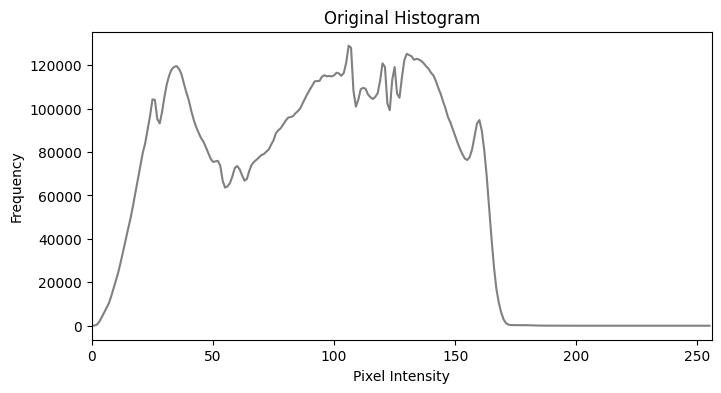

In [3]:
# Compute histogram
hist = cv2.calcHist([img], [0], None, [256], [0,256])

# Plot histogram
plt.figure(figsize=(8, 4))
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist, color='gray')
plt.xlim([0, 256])
plt.show()


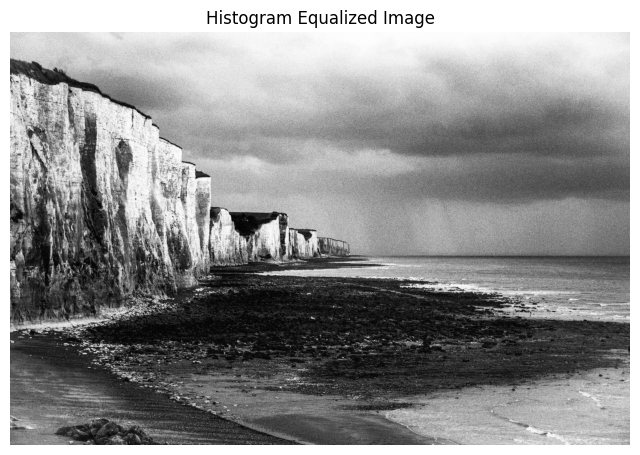

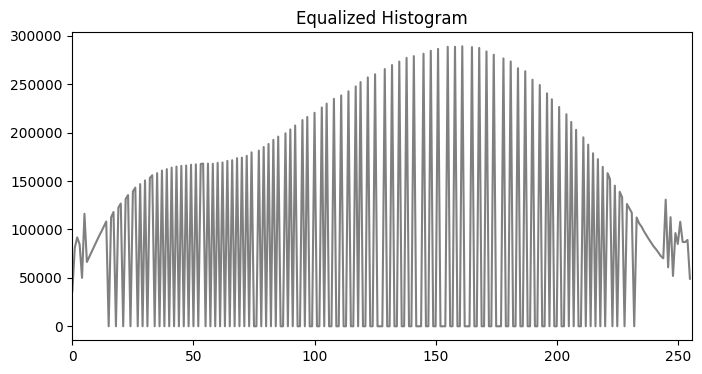

In [12]:
# Apply Histogram Equalization
equalized = cv2.equalizeHist(img)

# Display equalized image
plt.figure(figsize=(8, 6))
plt.title("Histogram Equalized Image")
plt.imshow(equalized, cmap='gray')
plt.axis('off')
plt.show()

# Compare histograms
hist_eq = cv2.calcHist([equalized], [0], None, [256], [0,256])
plt.figure(figsize=(8, 4))
plt.title("Equalized Histogram")
plt.plot(hist_eq, color='gray')
plt.xlim([0, 256])
plt.show()


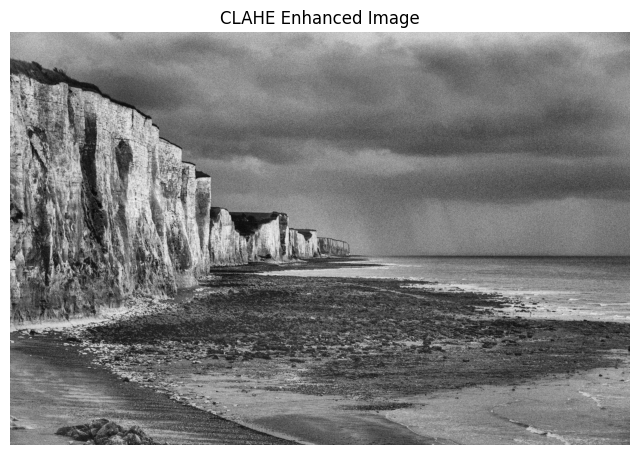

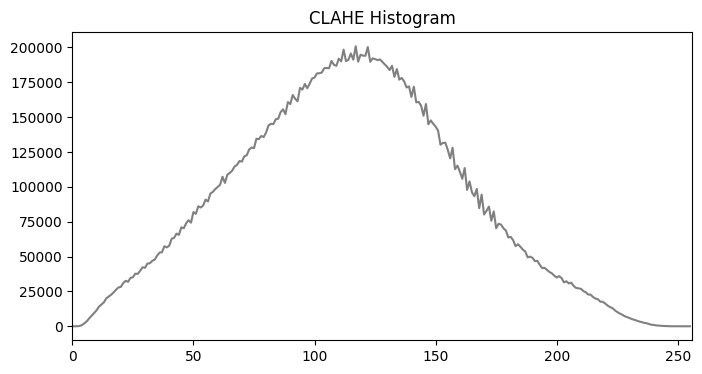

In [13]:
# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Apply CLAHE
clahe_img = clahe.apply(img)

# Display result
plt.figure(figsize=(8, 6))
plt.title("CLAHE Enhanced Image")
plt.imshow(clahe_img, cmap='gray')
plt.axis('off')
plt.show()

# Histogram for CLAHE
hist_clahe = cv2.calcHist([clahe_img], [0], None, [256], [0,256])
plt.figure(figsize=(8, 4))
plt.title("CLAHE Histogram")
plt.plot(hist_clahe, color='gray')
plt.xlim([0, 256])
plt.show()


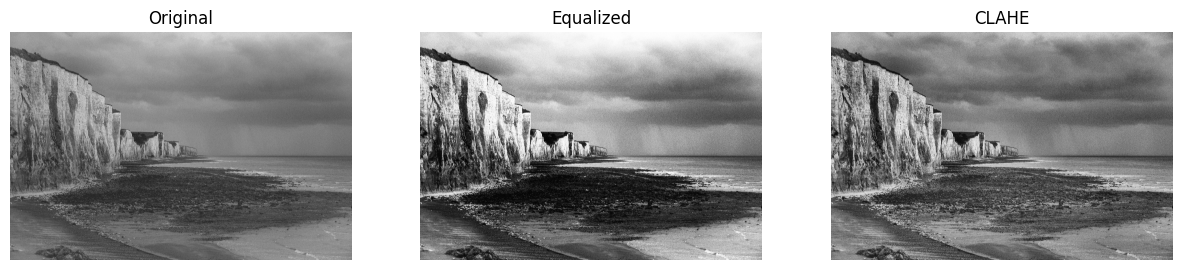

In [14]:
plt.figure(figsize=(15, 5))

titles = ['Original', 'Equalized', 'CLAHE']
images = [img, equalized, clahe_img]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


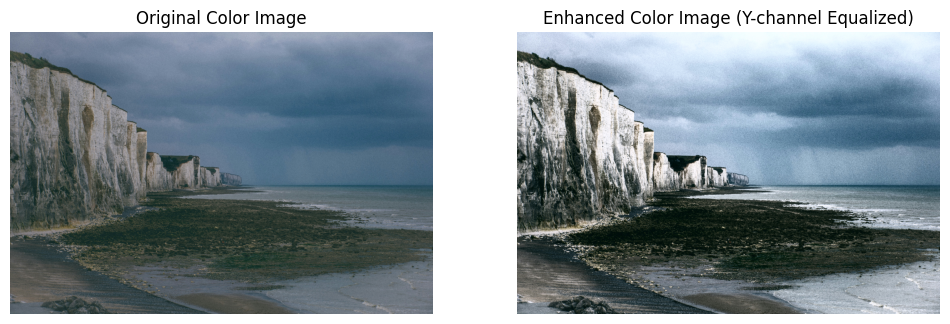

In [16]:
# Load color image
color_img = cv2.imread("dull.jpg")

# Convert from BGR to YCrCb
ycrcb = cv2.cvtColor(color_img, cv2.COLOR_BGR2YCrCb)

# Split channels
y, cr, cb = cv2.split(ycrcb)

# Equalize only the Y channel
y_eq = cv2.equalizeHist(y)

# Merge back and convert to BGR
ycrcb_eq = cv2.merge((y_eq, cr, cb))
color_eq = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

# Show before/after
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title("Original Color Image")
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Enhanced Color Image (Y-channel Equalized)")
plt.imshow(cv2.cvtColor(color_eq, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [17]:
def contrast_measure(image):
    return image.std()  # standard deviation of pixel intensities

print("Original contrast:", contrast_measure(img))
print("Equalized contrast:", contrast_measure(equalized))
print("CLAHE contrast:", contrast_measure(clahe_img))


Original contrast: 31.609904975178697
Equalized contrast: 73.68478558412342
CLAHE contrast: 44.470281599740495


In [18]:
cv2.imwrite("equalized.jpg", equalized)
cv2.imwrite("clahe.jpg", clahe_img)
cv2.imwrite("color_equalized.jpg", color_eq)


True